In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.metrics import precision_score, recall_score, f1_score




%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")


In [9]:
# 1. read in the data set

student = pd.read_csv('improved_student_admission_dataset.csv')
student.head()

,GPA,SAT_Score,Extracurricular_Activities,Admission_Status,GPA_Category,Activity_Level,SAT_Percentile,Academic_Score,Admission_Label
0,3.07,986,3,Rejected,Medium,Moderate,2.4,553.50,0
1,2.98,1095,4,Rejected,Medium,Moderate,26.8,571.75,0
2,3.10,1156,0,Rejected,Medium,Few,33.2,599.00,0
3,3.83,1501,8,Accepted,High,Many,96.0,758.25,2
4,3.56,1374,7,Accepted,High,Many,69.8,699.50,2


In [10]:
# 2. split into test and train -> objective is to predict admission status

# features/predictors
X = student[['GPA', 'SAT_Score', 'Extracurricular_Activities', 'SAT_Percentile', 'Academic_Score']]
# outcome/target
Y = student['Admission_Status']

# training set
X_train = X[0:175]
y_train = Y[0:175]

# testing set
X_test = X[175:]
y_test = Y[175:]


In [4]:
# 3. First ML algorithm -> Linear Discriminate Analysis

# create object "lda"
lda = LinearDiscriminantAnalysis()
# train lda model
lda.fit(X_train, y_train)
# make predictions on the model
preds = lda.predict(X_test)


# confusion matrix to summarize predictions
conf = confusion_matrix(y_test, preds)
print('LDA Confusion Matrix:\n')
print(lda.classes_)
print(conf)

# measures number of correct prediction / total predictions
acc = accuracy_score(y_test, preds)
print('\nThe accuracy is: ', acc)


# True positive / total positive
print("Precision:", precision_score(y_test, preds, average='weighted'))

# True positive / (True Positive + False Negative)
print("Recall:", recall_score(y_test, preds, average='weighted'))

# harmonic mean of precision and recall
print("F1 Score:", f1_score(y_test, preds, average='weighted'))


LDA Confusion Matrix:

['Accepted' 'Rejected' 'Waitlisted']
[[21  0  0]
 [ 0 21  0]
 [ 0  1 32]]

The accuracy is:  0.9866666666666667
Precision: 0.9872727272727273
Recall: 0.9866666666666667
F1 Score: 0.9867191413237925


In [5]:
# 4. Second ML algorithm -> Logisitc Regression

# create logreg object
logreg = LogisticRegression(max_iter=1000)
# train model
logreg.fit(X_train, y_train)
# make predictions on the mode
preds = logreg.predict(X_test)


# confusion matrix to summarize predictions
conf = confusion_matrix(y_test, preds)
print(" Logreg Confusion Matrix:\n")
print(logreg.classes_)
print(conf)

# correct prediction / total predictions
acc = accuracy_score(y_test, preds)
print("\nThe accuracy is:", acc)

# # True positive / total positive
print("Precision:", precision_score(y_test, preds, average='weighted'))
# True positive / (True Positive + False Negative)
print("Recall:", recall_score(y_test, preds, average='weighted'))
# harmonic mean of precision and recall
print("F1 Score:", f1_score(y_test, preds, average='weighted'))

 Logreg Confusion Matrix:

['Accepted' 'Rejected' 'Waitlisted']
[[21  0  0]
 [ 0 21  0]
 [ 1  1 31]]

The accuracy is: 0.9733333333333334
Precision: 0.9745454545454546
Recall: 0.9733333333333334
F1 Score: 0.9732267441860465


In [6]:
# 5. Third ML algorithm -> K-Nearest Neighbours

# knn object -> 5 nearest neighbours
knn = KNeighborsClassifier(5)
# train knn model
knn.fit(X_train, y_train)
# make predictions on it
preds = knn.predict(X_test)

# confusion matrix to summarize predictions
conf = confusion_matrix(y_test, preds)
print('KNN Confusion Matrix:\n')
print(knn.classes_)
print(conf)

# correct prediction / total predictions
acc = accuracy_score(y_test, preds)
print('\nThe accuracy is: ', acc)

# # True positive / total positive
print("Precision:", precision_score(y_test, preds, average='weighted'))
# True positive / (True Positive + False Negative)
print("Recall:", recall_score(y_test, preds, average='weighted'))
# harmonic mean of precision and recall
print("F1 Score:", f1_score(y_test, preds, average='weighted'))


KNN Confusion Matrix:

['Accepted' 'Rejected' 'Waitlisted']
[[20  0  1]
 [ 0 21  0]
 [ 0  2 31]]

The accuracy is:  0.96
Precision: 0.9619021739130433
Recall: 0.96
F1 Score: 0.9601357666723519


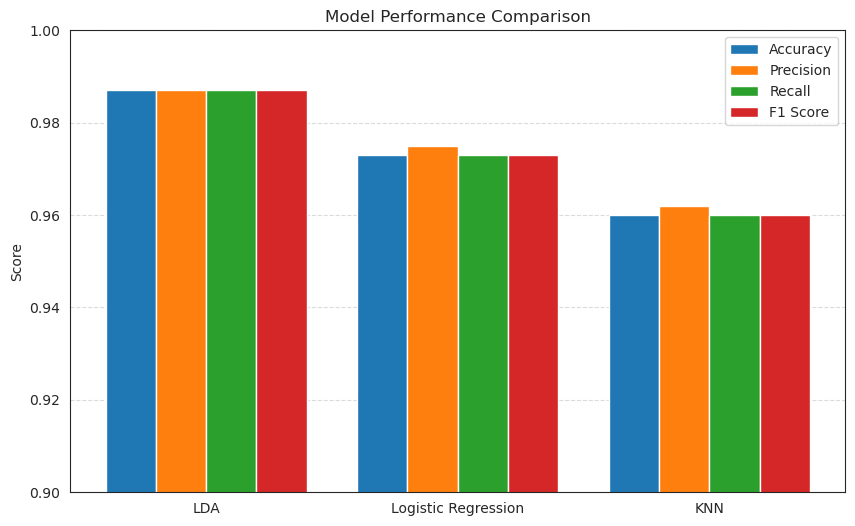

In [12]:
import numpy as np
# Purpose: Visually compares accuracy, precision, recall, and F1 score across the three models.
# Replace these with your actual values
models = ['LDA', 'Logistic Regression', 'KNN']
accuracy = [0.987, 0.973, 0.96]
precision = [0.987, 0.975, 0.962]
recall = [0.987, 0.973, 0.96]
f1 = [0.987, 0.973, 0.96]

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10,6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar(x + 1.5*width, f1, width, label='F1 Score')

plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, models)
plt.ylim(0.9, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()